<a href="https://colab.research.google.com/github/jt181/Man-United-Squad-Tracker/blob/main/VehicleCollisionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/dthomas1108/year4-data-visualisation-assignment/refs/heads/master/collision2017.csv

--2025-12-01 15:32:15--  https://raw.githubusercontent.com/dthomas1108/year4-data-visualisation-assignment/refs/heads/master/collision2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 464817 (454K) [text/plain]
Saving to: ‘collision2017.csv’

collision2017.csv   100%[===================>] 453.92K  --.-KB/s    in 0.04s   

2025-12-01 15:32:16 (12.6 MB/s) - ‘collision2017.csv’ saved [464817/464817]



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer

In [4]:
csv_path = 'collision2017.csv'

df = pd.read_csv(csv_path)

display(df.head(10))
print('Shape:', df.shape)
print('Columns:', list(df.columns))

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
0,2017,1,NEMD,3,1,1,SUN,1,1,3,...,,,,,,,,,,
1,2017,2,MEAN,3,2,1,SUN,1,1,3,...,,,,,,,,,,
2,2017,3,ARBC,2,1,1,SUN,1,1,10,...,2,7,1,1,2,10,1,1,1,1
3,2017,4,ANTN,3,2,1,SUN,1,1,10,...,,,,,,,,,,
4,2017,5,ANTN,2,2,2,SUN,1,1,11,...,1,1,1,1,2,1,1,1,1,1
5,2017,6,ARND,3,2,4,SUN,1,1,12,...,,,,,,,,,,
6,2017,7,LISC,3,3,1,SUN,1,1,13,...,,,,,,,,,,
7,2017,8,MEAN,2,1,2,SUN,1,1,17,...,1,1,1,1,2,1,2,1,1,1
8,2017,9,CCGL,2,1,1,MON,2,1,8,...,10,7,1,1,1,1,4,1,1,1
9,2017,10,MEAN,2,3,4,MON,2,1,9,...,10,7,1,1,2,9,4,1,1,1


Shape: (6081, 25)
Columns: ['a_year', 'a_ref', 'a_District', 'a_type', 'a_veh', 'a_cas', 'a_wkday', 'a_day', 'a_month', 'a_hour', 'a_min', 'a_gd1', 'a_gd2', 'a_ctype', 'a_speed', 'a_jdet', 'a_jcont', 'a_pedhum', 'a_pedphys', 'a_light', 'a_weat', 'a_roadsc', 'a_speccs', 'a_chaz', 'a_scene']


In [8]:
# Create a transformer from Irish Grid (EPSG:29903) to WGS84 (EPSG:4326)
transformer = Transformer.from_crs("EPSG:29903", "EPSG:4326", always_xy=True)

# Convert Easting/Northing to Longitude/Latitude
# The transformer returns (longitude, latitude)
df['longitude'], df['latitude'] = transformer.transform(
    df['a_gd1'].values,
    df['a_gd2'].values
)

# View the results
print(df[['a_gd1', 'a_gd2', 'longitude', 'latitude']].head(10))

    a_gd1   a_gd2  longitude   latitude
0  339189  339097  -5.863640  54.281742
1  305164  401602  -6.363452  54.851131
2  288498  345801  -6.639651  54.353228
3  334975  380862  -5.909253  54.657811
4  313692  389836  -6.235357  54.743628
5  353373  375446  -5.627257  54.603946
6  327818  363612  -6.027577  54.504807
7  321640  399559  -6.107941  54.829062
8  267513  409174  -6.947728  54.925622
9  311983  396730  -6.259224  54.805910


In [7]:
print(df['a_District'].value_counts())

a_District
BELC    1478
ARBC     601
NEMD     574
LISC     525
ANTN     471
DCST     449
MIDU     436
ARND     430
CCGL     407
MEAN     390
FERO     320
Name: count, dtype: int64


Please examine the output of the `a_District` value counts. This should help confirm whether the dataset primarily covers areas within Great Britain or if there are any districts indicating coverage in Northern Ireland.

In [11]:
import folium

# Create a map centered around the approximate center of Northern Ireland
map_center_lat = df['latitude'].mean()
map_center_lon = df['longitude'].mean()

m = folium.Map(location=[map_center_lat, map_center_lon], zoom_start=8) # Increased zoom for Northern Ireland

# Add a sample of points to the map
for _, row in df.sample(min(1000, len(df)), random_state=42).iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Display the map
display(m)

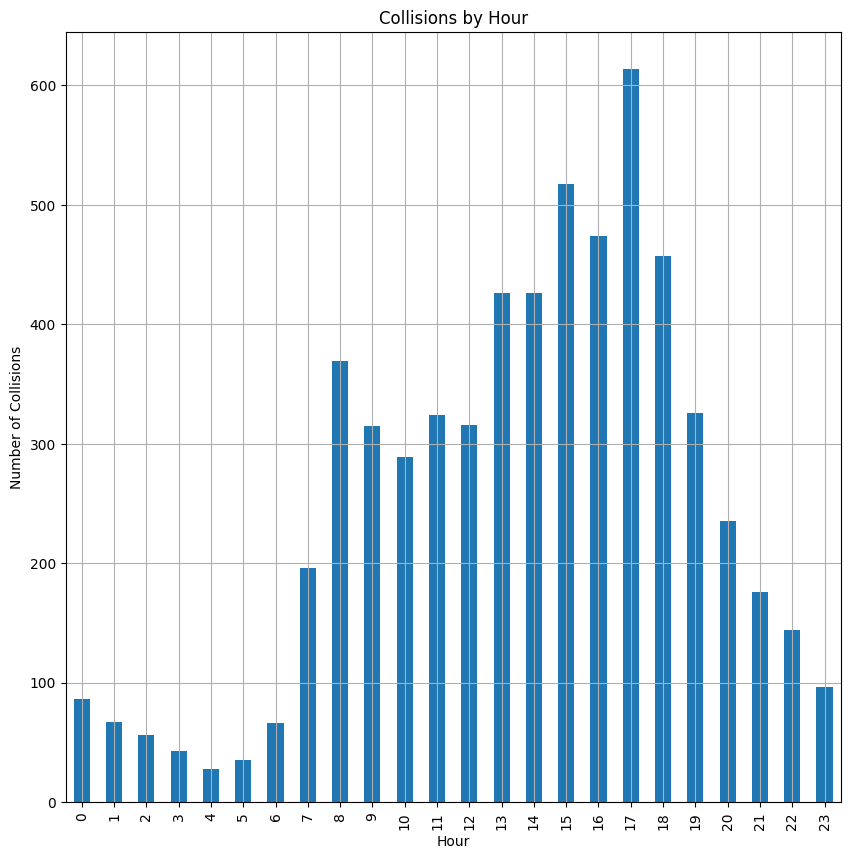

In [17]:
#Collisions by Hour
df['a_hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,10))
plt.title('Collisions by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.show()

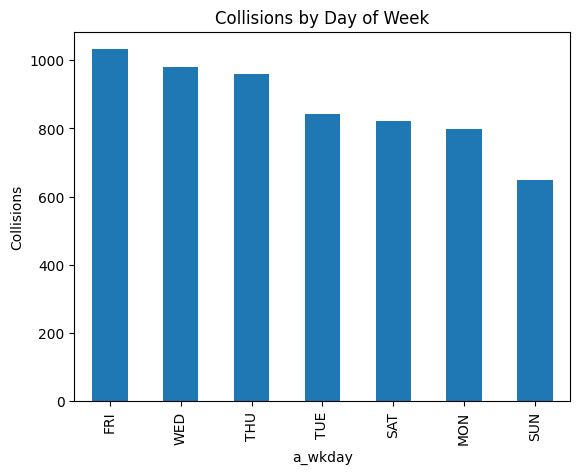

In [15]:
#Collisions by Day of Week
df['a_wkday'].value_counts().plot(kind='bar')
plt.title('Collisions by Day of Week')
plt.ylabel('Collisions')
plt.show()

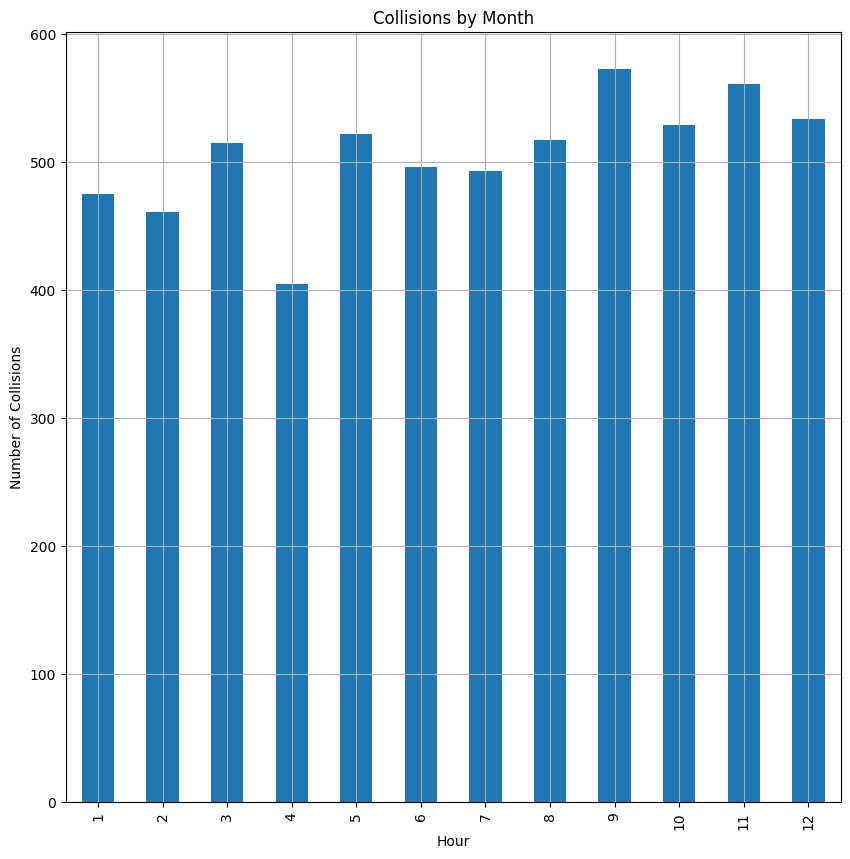

In [18]:
#Collisions by Month
df['a_month'].value_counts().sort_index().plot(kind='bar', figsize=(10,10))
plt.title('Collisions by Month')
plt.xlabel('Hour')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.show()

In [19]:
pd.crosstab(df['a_hour'], df['a_sev']).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Collision Severity by Hour")
plt.show()


KeyError: 'a_sev'